In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

# Preamble
The data was processed using provided R code and saved to disk as a TSV.

In [2]:
gis_path = 'data/output/costanzo_gis_adj.tsv'

In [3]:
gis_df = pd.read_csv(gis_path, sep='\t')
gis_df.index = gis_df.columns

In [4]:
gis_df.head()

,dma3986,dma969,dma2913,dma2871,dma86,dma2378,dma955,dma2338,dma272,dma2549,...,dma4417,dma3050,dma1905,dma1565,dma5343,dma3023,dma4495,dma796,dma2289,dma1373
dma3986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dma969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dma2913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dma2871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dma86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
gis_df.shape

(2803, 2803)

In [6]:
gis = nx.from_pandas_adjacency(gis_df)

# Excercise 1
Answers for 1a-d. are printed below

In [7]:
n_nodes = nx.number_of_nodes(gis)
n_edges = nx.number_of_edges(gis)
n_possible_edges = n_edges * (n_edges - 1) / 2

print('Number of vertices:', n_nodes)
print('Number of vertices:', n_edges)
print('Average degree:', np.mean(np.sum(gis_df.values, axis=0)))
print('Density:', n_edges / n_possible_edges)

Number of vertices: 2803
Number of vertices: 33634
Average degree: 23.998572957545488
Density: 5.9465406000059466e-05


# Excercise 2
Plots for 2a and 2b are below

Text(0.5, 1.0, 'Histogram of degrees')

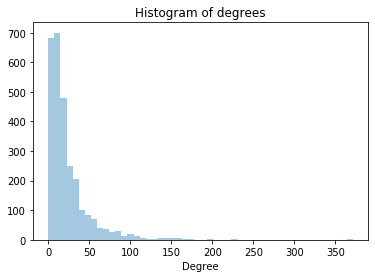

In [8]:
degrees = np.sum(gis_df.values, axis=0)
ax = sns.distplot(degrees, kde=False)
ax.set_xlabel('Degree')
ax.set_title('Histogram of degrees')

In [9]:
k, pk = np.unique(degrees, return_counts=True)
if k[0] == 0:
    k = k[1:]
    pk = pk[1:]

In [10]:
log_pk = np.log(pk)
log_k = np.log(k)

Text(0.5, 1.0, 'log-log plot of degrees')

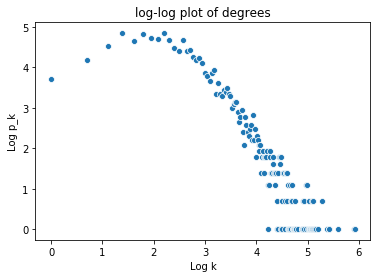

In [11]:
ax = sns.scatterplot(x=log_k, y=log_pk)
ax.set_xlabel('Log k')
ax.set_ylabel('Log p_k')
ax.set_title('log-log plot of degrees')

# Excercise 3 and 4
- The pairwise distances are computed using the Floyd-Warshall algorithm implemented in the NetworkX python package

In [12]:
distances = nx.floyd_warshall_numpy(gis)

In [13]:
unique_pairs_idxs = np.triu_indices_from(distances, k=1)

In [14]:
unique_distances = distances[unique_pairs_idxs]
unique_distances = unique_distances[np.isfinite(unique_distances)]

Answers to 4a) and 4b) are printed below

In [15]:
print('average distance', np.mean(unique_distances))
print('network diameter', np.max(unique_distances))

average distance 2.7606892830154126
network diameter 6.0


The plot of the distance distribution for 4c) is below

Text(0.5, 0, 'Distance')

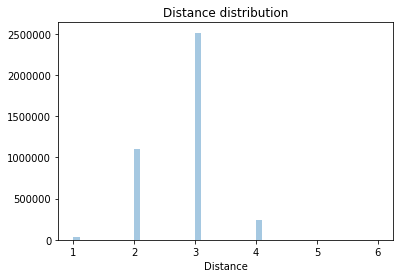

In [16]:
ax = sns.distplot(unique_distances, kde=False)
ax.set_title('Distance distribution')
ax.set_xlabel('Distance')

# Excercise 5
The network is not connected and has 15 components

In [17]:
n_components = nx.number_connected_components(gis)
print('Number of connected_components', n_components)

Number of connected_components 15


# Excercise 6

In [18]:
cluster_coeffs = nx.clustering(gis)
c_nodes, cluster_coeffs = zip(*cluster_coeffs.items())

In [19]:
d_nodes, degrees = zip(*dict(nx.degree(gis)).items())

In [20]:
np.all(c_nodes == d_nodes)

True

In [21]:
coeff_df = pd.DataFrame(data=dict(degree=degrees, coeffs=cluster_coeffs), index=d_nodes)

In [22]:
coeff_means = coeff_df.groupby('degree').mean()

In [23]:
coeffs = coeff_means.values.reshape(-1)
degs = coeff_means.index.values

In [24]:
not_zero = np.logical_and(degs != 0, ~np.isclose(coeffs,0))

Text(0.5, 1.0, 'Log-log plot of average clustering coeffs by degree')

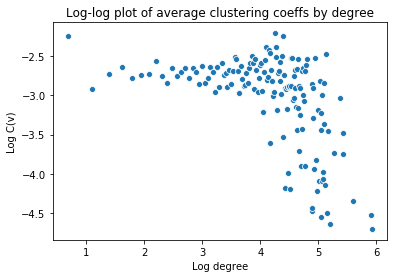

In [25]:
ax = sns.scatterplot(x = np.log(degs[not_zero]), y=np.log(coeffs[not_zero]))
ax.set_xlabel('Log degree')
ax.set_ylabel('Log C(v)')
ax.set_title('Log-log plot of average clustering coeffs by degree')